In [45]:
import pandas as pd
import sklearn.linear_model as models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Считывание train.csv

In [46]:
csv = pd.read_csv("train.csv")
target = csv["target"]
csv = csv.drop(['target'], axis=True)
csv.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.5830,5.0,7.272727,1.099567,617.0,2.670996,33.49,-117.71
1,3.8141,52.0,5.568000,1.034667,908.0,2.421333,34.08,-118.35
2,4.4081,39.0,4.657360,0.983503,1519.0,1.927665,37.94,-122.54
3,5.7984,20.0,7.186957,1.093478,1374.0,2.986957,38.28,-122.45
4,3.9265,11.0,4.975904,0.903614,684.0,4.120482,38.03,-121.28


Нормализация даты для работы с регрессией

https://scikit-learn.org/1.5/modules/preprocessing.html

In [47]:
normalized_csv = (csv - csv.mean()) / csv.std()
normalized_csv.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.487190,-1.891030,0.707218,0.003728,-0.706826,-0.037227,-0.999339,0.925560
1,-0.027686,1.855939,0.052834,-0.124090,-0.452620,-0.058774,-0.722514,0.605339
2,0.285560,0.819543,-0.296729,-0.224856,0.081127,-0.101380,1.088579,-1.491112
3,1.018733,-0.695189,0.674294,-0.008264,-0.045540,-0.009959,1.248105,-1.446081
4,0.031588,-1.412694,-0.174451,-0.382191,-0.648297,0.087870,1.130806,-0.860676


Обучение модели

In [87]:
regression = models.LinearRegression()
regression.fit(normalized_csv, target)
predict = regression.predict(normalized_csv)

In [88]:
predict = pd.concat([normalized_csv, pd.Series(predict)], axis=1)
predict.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,0
0,2.487190,-1.891030,0.707218,0.003728,-0.706826,-0.037227,-0.999339,0.925560,382225.876828
1,-0.027686,1.855939,0.052834,-0.124090,-0.452620,-0.058774,-0.722514,0.605339,234395.429435


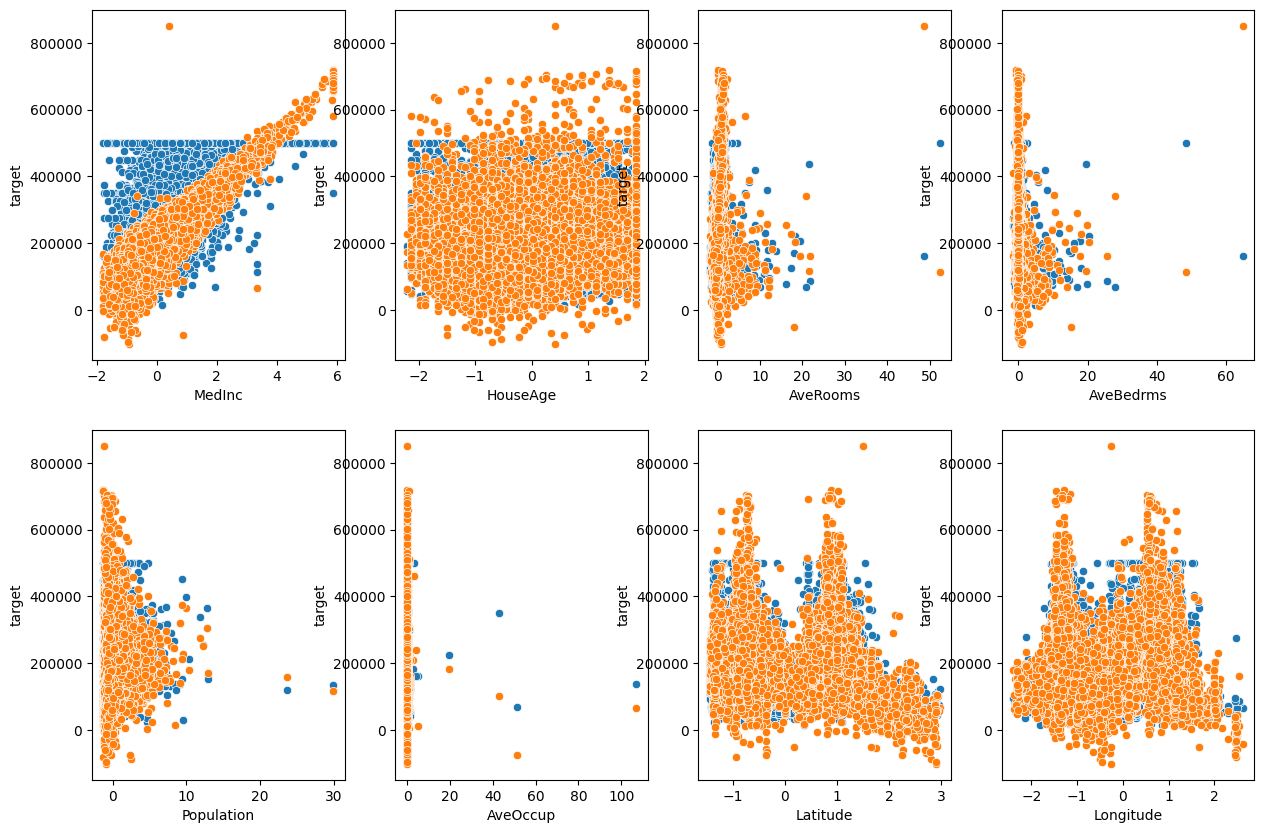

In [89]:
fig, axs = plt.subplots(2, 4, figsize=(15,10))

columns = [["MedInc", "HouseAge", "AveRooms", "AveBedrms"], ["Population", "AveOccup", "Latitude", "Longitude"]]
for i in range(2):
    for j in range(4):
        sns.scatterplot(x=normalized_csv[columns[i][j]], y=target, ax=axs[i,j])
        sns.scatterplot(x=normalized_csv[columns[i][j]], y=predict[0], ax=axs[i,j])

In [90]:
print(f"Коэффециент детерминации {regression.score(normalized_csv, target)}")
print(f"MAE {np.abs(target - predict[0]).sum() / target.shape[0]}")

Коэффециент детерминации 0.6041637162161808
MAE 53491.4603033664


Считывания test.csv и нормализация

In [73]:
test_csv = pd.read_csv("test.csv")
test_csv.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4123,3.3320,16.0,5.815789,1.099723,2140.0,2.963989,37.02,-119.57
4124,6.2953,26.0,6.823899,1.091195,849.0,2.669811,37.92,-122.49
4125,2.9911,52.0,3.922840,1.089506,1076.0,3.320988,37.74,-122.42
4126,6.5268,30.0,6.034247,0.900685,761.0,2.606164,34.23,-118.48
4127,4.0446,36.0,5.726225,1.115274,1065.0,3.069164,38.43,-122.87


In [74]:
normalized_test = (test_csv - test_csv.mean()) / test_csv.std()
normalized_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.785000,-1.201439,-0.048479,-0.237637,-0.330710,-0.617168,-1.141914,1.151434
1,-1.083785,-0.417062,-0.281497,-0.241656,-0.586695,-0.492625,1.898916,-0.994067
2,-0.910752,0.916380,-0.818327,-0.217818,0.671975,0.762481,-0.803012,0.657079
3,0.631449,-0.573937,0.207095,-0.169329,0.779175,0.437024,-0.919074,0.859765
4,-0.928672,-0.103311,0.825063,1.898905,-0.627357,-0.387744,1.550729,-1.523027


_____________________________

In [75]:
answer = regression.predict(normalized_test)

In [77]:
to_csv = pd.read_csv("sample_submission.csv")
to_csv['target'] = answer
to_csv.to_csv("submission.csv", index=False)